In [1]:
#impot libraries
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [2]:
#read the dataset
import pandas as pd
PACS = pd.read_csv('C:\\Users\\higor\\Documents\\GitHub\\TCC\\Jupyter\\Arquivo CSV\\PACS01 - Trafego Out VDX PACS01_To_CORE02.csv', index_col=[0],parse_dates=True,squeeze=True)
PACS.head()

time
2021-09-02 14:11:03     93976728
2021-09-02 14:12:03    163203744
2021-09-02 14:12:33     89591192
2021-09-02 14:13:03    151828552
2021-09-02 14:13:33     95153912
Name: bits, dtype: int64

In [3]:
#check the type
type(PACS)

pandas.core.series.Series

In [4]:
#convert the month to index column for easy manipulation
#make the date column to proper date
#convert the dataframe to series
PACS = pd.read_csv('C:\\Users\\higor\\Documents\\GitHub\\TCC\\Jupyter\\Arquivo CSV\\PACS01 - Trafego Out VDX PACS01_To_CORE02.csv', index_col=[0],parse_dates=True,squeeze=True)

In [5]:
type(PACS)

pandas.core.series.Series

<AxesSubplot:xlabel='time'>

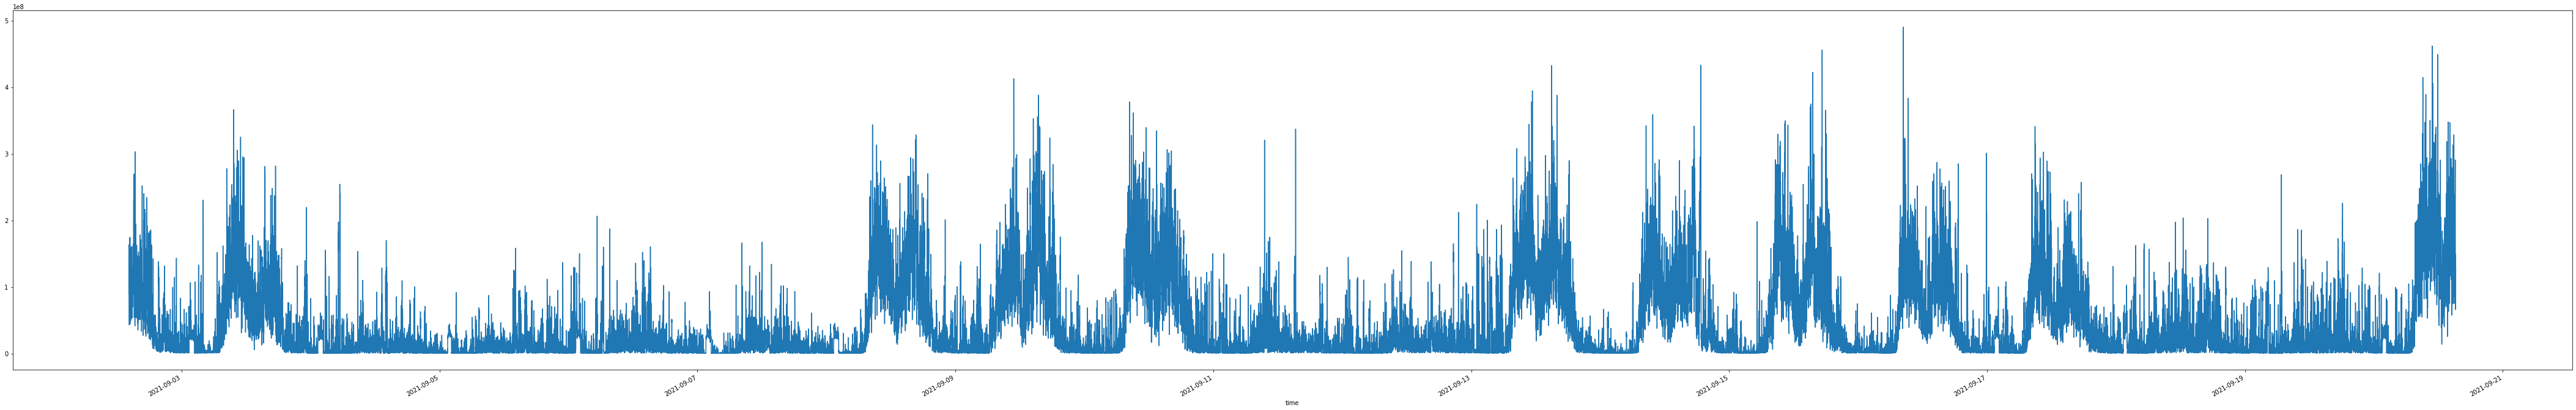

In [6]:
#plot the data
PACS.plot(figsize=(75,12))

<AxesSubplot:xlabel='time'>

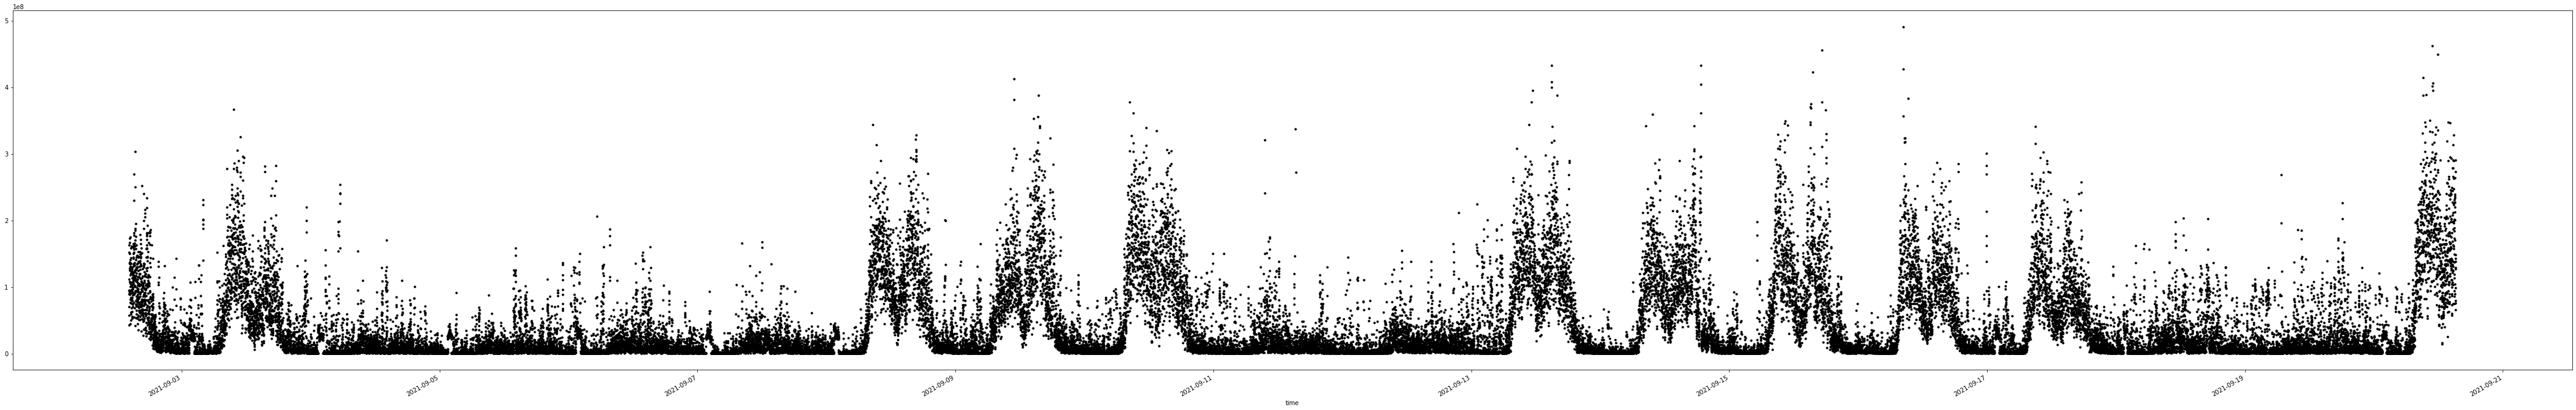

In [7]:
PACS.plot(style='k.',figsize=(75,12))

In [8]:
#check the data points
PACS.size

50000

In [9]:
PACS.describe()

count    5.000000e+04
mean     4.007341e+07
std      5.654302e+07
min      2.152880e+05
25%      2.760058e+06
50%      1.351142e+07
75%      5.655816e+07
max      4.903373e+08
Name: bits, dtype: float64

Standard deviation - dispersion of a dataset relative to its mean and is calculated as the square root of the variance. The mean can be used to get an overall idea, or picture, of the data set. Mean is best used for a data set with numbers that are close together. The median can be used to get an idea of what values fall above the midpoint and what values fall below the midpoint.

<AxesSubplot:xlabel='time'>

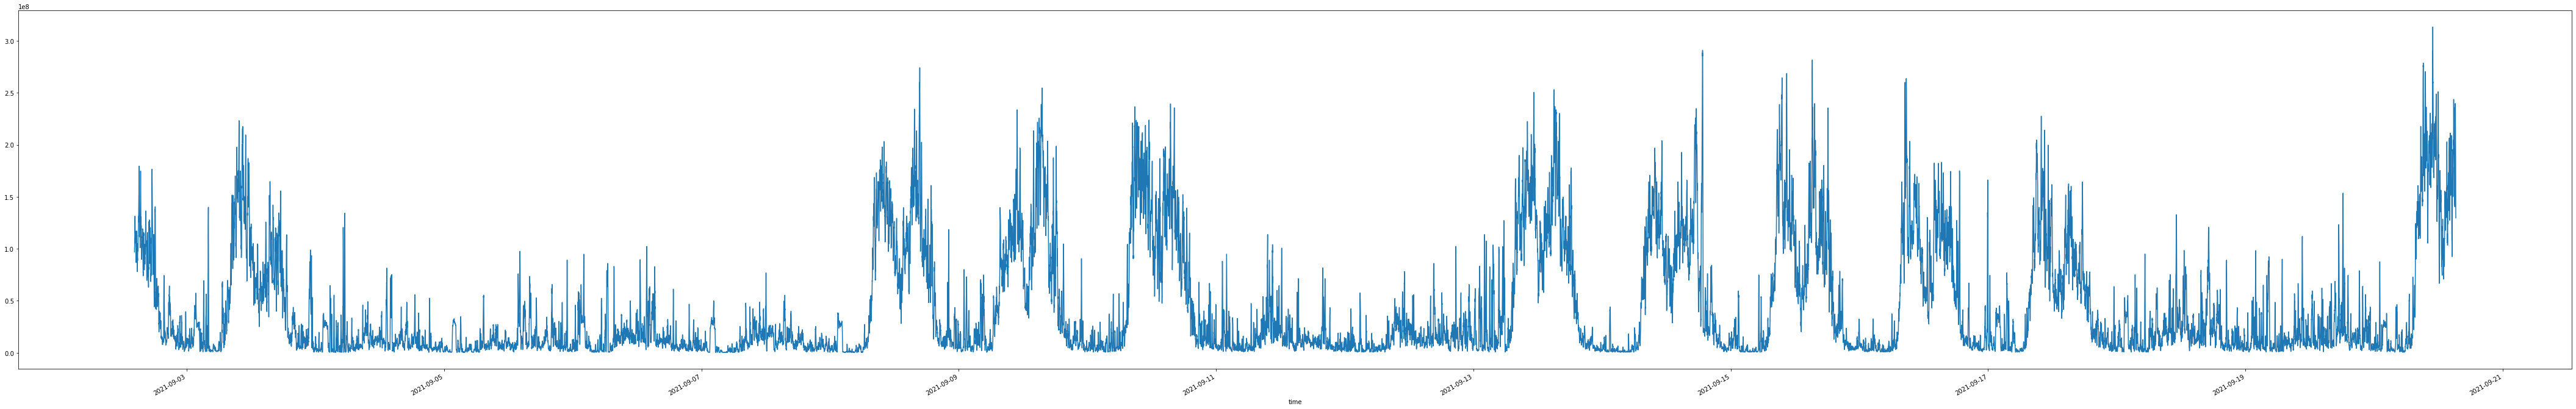

In [10]:
#smoothing of time series
PACS_ma=PACS.rolling(window=10).mean()
PACS_ma.plot(figsize=(75,12))

In [11]:
#create a baseline model
PACS

time
2021-09-02 14:11:03     93976728
2021-09-02 14:12:03    163203744
2021-09-02 14:12:33     89591192
2021-09-02 14:13:03    151828552
2021-09-02 14:13:33     95153912
                         ...    
2021-09-20 15:11:33    142768752
2021-09-20 15:12:03     98913568
2021-09-20 15:12:33     65983776
2021-09-20 15:13:03     79619216
2021-09-20 15:13:33    127371504
Name: bits, Length: 50000, dtype: int64

In [12]:
#shift one data point down
PACS_base = pd.concat([PACS,PACS.shift(1)],axis=1)

In [13]:
PACS_base

,bits,bits
time,,
2021-09-02 14:11:03,93976728,NaN
2021-09-02 14:12:03,163203744,93976728.0
2021-09-02 14:12:33,89591192,163203744.0
2021-09-02 14:13:03,151828552,89591192.0
2021-09-02 14:13:33,95153912,151828552.0
...,...,...
2021-09-20 15:11:33,142768752,128789408.0
2021-09-20 15:12:03,98913568,142768752.0
2021-09-20 15:12:33,65983776,98913568.0


In [14]:
#rename the columns
PACS_base.columns = ['Atual','Previsao']
PACS_base.head()

,Atual,Previsao
time,,
2021-09-02 14:11:03,93976728,NaN
2021-09-02 14:12:03,163203744,93976728.0
2021-09-02 14:12:33,89591192,163203744.0
2021-09-02 14:13:03,151828552,89591192.0
2021-09-02 14:13:33,95153912,151828552.0


In [15]:
#drop the null value and make changes to the data
PACS_base.dropna(inplace=True)

In [16]:
PACS_base.head()

,Atual,Previsao
time,,
2021-09-02 14:12:03,163203744,93976728.0
2021-09-02 14:12:33,89591192,163203744.0
2021-09-02 14:13:03,151828552,89591192.0
2021-09-02 14:13:33,95153912,151828552.0
2021-09-02 14:14:03,70406728,95153912.0


In [17]:
#calculation of error between the actual and forecast sales
#import libraries
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
PACS_error=mean_squared_error(PACS_base.Atual,PACS_base.Previsao)
PACS_error

850730733715236.0

In [19]:
#make the value follow the series matrix (NAIVE model)
np.sqrt(PACS_error)

29167288.76181734

In [20]:
#create different types of models
#most people use ARIMA(Auto Regressive Integrated Moving Average because it contains different functions)
#ARIMA(p,d,q)
#ARIMA(2,0,0) - auto regressive model (ARI)
#ARIMA(0,0,2) - moving averaged mode (MA)
#we wil use ARIMA which is a combination of everything
#pacf is to evaluate ARI
#acf is for MA

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf




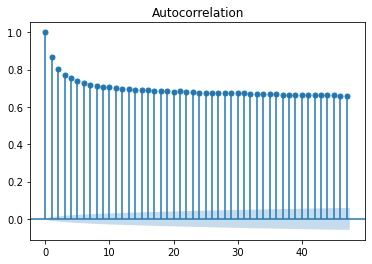

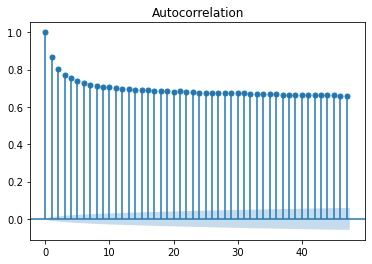

In [21]:
plot_acf(PACS)

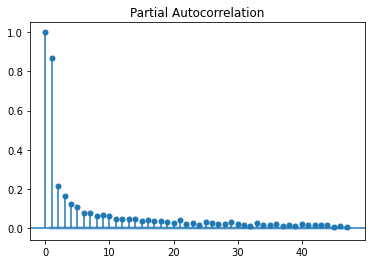

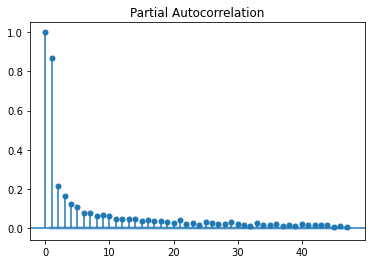

In [22]:
#q - 3 p-2, 
#d - 0-2 (makes the series stationary by removing the seasonality and trends hence helps in doing prediction)
plot_pacf(PACS)

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
tamanho = int(PACS.size/2)
PACS_train = PACS[0:tamanho]
PACS_test = PACS[tamanho:] #so that we have some some unseen data when evaluating our model for the calculation of error matrix

In [25]:
PACS_model = ARIMA(PACS_train,order=(3,1,2)) #order is q,p,d (experiment with a couple of models to get the right fit)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [26]:
PACS_model_fit=PACS_model.fit()

In [27]:
#check how good the model is
PACS_model_fit.aic

921008.2456289713

In [28]:
PACS_forecast = PACS_model_fit.forecast(steps=11)[0] # O has the actual forecast values

In [29]:
np.sqrt(mean_squared_error(PACS_test,PACS_forecast))

ValueError: Found input variables with inconsistent numbers of samples: [25000, 11]

In [30]:
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
for p in p_values:
  for d in d_values:
    for q in q_values:
        order = (p,d,q)
        train,test= PACS[0:25], PACS[25:36]
        predictions = list()
        for i in range(len(test)):
            try:
                model = ARIMA(train, order)
                model_fit = model.fit(disp=0)
                pred_y=model_fit.forecast()[0]
                predictions.append(pred_y)
                error = mean_squared_error(test,predictions)
                print('ARIMA%s MSE=%.2f'% (order,error))
            except:
                continue

ARIMA(0, 0, 1) MSE=344485119951347.00
ARIMA(0, 0, 2) MSE=327335866276241.56
ARIMA(0, 0, 3) MSE=311876065950966.06
ARIMA(0, 0, 4) MSE=360379950073058.06
ARIMA(0, 1, 1) MSE=1103289662404950.00
ARIMA(0, 1, 2) MSE=1249220682843718.25
ARIMA(0, 1, 3) MSE=1139640841520018.25
ARIMA(0, 1, 4) MSE=362039860698348.06
ARIMA(0, 2, 1) MSE=988956276861842.75
ARIMA(0, 2, 2) MSE=397527002908559.12
ARIMA(0, 2, 3) MSE=346973949483013.25
ARIMA(0, 2, 4) MSE=791962905239921.12
ARIMA(1, 0, 0) MSE=341269527417672.69
ARIMA(1, 0, 1) MSE=381806913540898.00
ARIMA(1, 0, 2) MSE=398899497599841.06
ARIMA(1, 0, 3) MSE=327069839427020.75
ARIMA(1, 0, 4) MSE=293800548749465.94
ARIMA(1, 1, 0) MSE=306511911350091.94
ARIMA(1, 1, 1) MSE=1122548074612092.38
ARIMA(1, 1, 3) MSE=1663540987290262.25
ARIMA(1, 1, 4) MSE=1230708917923384.75
ARIMA(1, 2, 0) MSE=5627489520871863.00
ARIMA(1, 2, 1) MSE=313662647270265.81
ARIMA(2, 0, 0) MSE=321013821452761.25
ARIMA(2, 0, 1) MSE=402326873382514.75
ARIMA(2, 0, 2) MSE=422293722091322.94
ARIMA

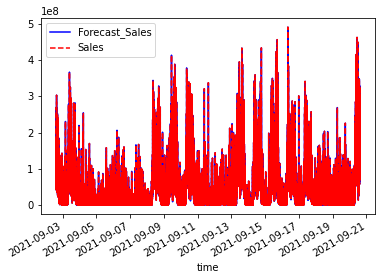

In [39]:
#Plotting forecast using Naive model results

pd.plotting.register_matplotlib_converters()
plt.plot(figsize=(100,25))
PACS_base["Previsao"].plot(color="b", legend=True, label="Forecast_Sales")
PACS_base["Atual"].plot(style="--",color="r", legend=True, label="Sales");